# Reading Unseen Data

In [2]:
#read unseen data

import pandas as pd
data = pd.read_csv("../cleaned_datasets/unseen_data.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,-1.666660,0.238278,0.188707,-0.379905
1,-0.481196,-0.710986,-0.344876,-0.153465
2,-0.823310,0.401916,3.545684,-0.602499
3,-0.937676,1.131803,-0.238866,-0.211773
4,-1.687920,-0.015581,0.330053,-0.417831


# Importing trained models

In [4]:
import pickle

with open('../trained_models/tuned_rf_model.pkl', 'rb') as f:
    model_rf = pickle.load(f)

In [5]:
with open('../trained_models/tuned_sc_model.pkl', 'rb') as f:
    model_sc = pickle.load(f)

In [6]:
with open('../trained_models/tuned_vc_model.pkl', 'rb') as f:
    model_vc = pickle.load(f)

In [7]:
with open('../trained_models/tuned_xgboost_model.pkl', 'rb') as f:
    model_xg = pickle.load(f)

# Evaluating the models on unseen data

The code below imports the `time` module, which is a built-in Python module that provides a way to measure time in various units. The purpose of the code is to measure the time taken by four different machine learning models to make predictions on a given dataset.

To accomplish this, a list named `times` is created to store the time taken by each model. The `start_time` variable is then set to the current time using the `time.time()` function. This function returns the current time in seconds.

After setting the `start_time`, each machine learning model is used to make predictions on the given dataset, which is represented by the variable `df`. The time taken by each model to make predictions is calculated by subtracting the `start_time` from the current time, and this value is appended to the `times` list.

Finally, the `times` list is printed to the console, which displays the time taken by each model to make predictions. This information can be used to compare the performance of the different models and choose the one that provides the best results in the shortest amount of time.

In [10]:
import time

# Create a list to store the time taken by each model to make predictions
times = []

# Record the time taken by each model to make predictions
start_time = time.time()
prediction_rf = model_rf.predict(df)
times.append(time.time() - start_time)

start_time = time.time()
prediction_sc = model_sc.predict(df)
times.append(time.time() - start_time)

start_time = time.time()
prediction_vc = model_vc.predict(df)
times.append(time.time() - start_time)

start_time = time.time()
prediction_xg = model_xg.predict(df)
times.append(time.time() - start_time)


print(times)


[0.01491999626159668, 0.019935131072998047, 0.014592647552490234, 0.004256010055541992]


/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


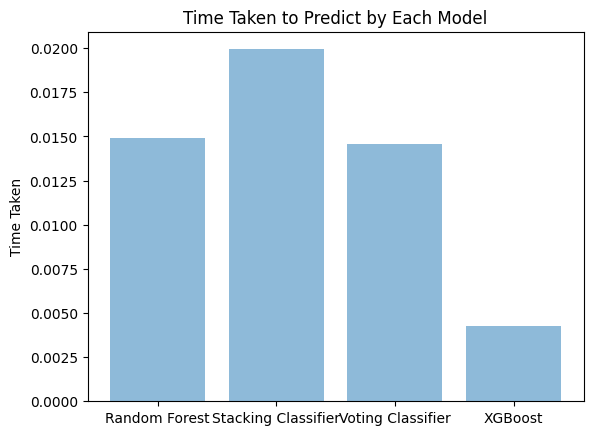

In [11]:
#visualising the time taken to predict
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Stacking Classifier', 'Voting Classifier', 'XGBoost']
y_pos = np.arange(len(models))

plt.bar(y_pos, times, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Time Taken')
plt.title('Time Taken to Predict by Each Model')

plt.show()

From the above results, it is evident that the XGBoost Classifier has the most optimised prediction process, as it produces the fastest results. Moreover, it should also be noted that the Voting and Stacking Classifiers which are a combination of ensemble methods including XGBoost, are not as fast as the other two ensemble methods, and have varying prediction speeds. This is because the voting and stacking classifiers combines multiple models (e.g., decision tree, random forest, etc.) to make a prediction, while XGBoost uses a gradient boosting algorithm. Additionally, the voting classifier and stacking classifier combine multiple models, and the more models that are combined, the longer they may take to make a prediction.

# Saving the predictions

In [13]:
#saving the predictions made by the above models
prediction_rf = pd.DataFrame(prediction_rf)
prediction_rf.to_csv("prediction_rf.csv")

In [19]:
prediction_sc = pd.DataFrame(prediction_sc)
prediction_sc.to_csv("prediction_sc.csv")

In [18]:
prediction_vc = pd.DataFrame(prediction_vc)
prediction_vc.to_csv("prediction_vc.csv")

In [16]:
prediction_xg = pd.DataFrame(prediction_xg)
prediction_xg.to_csv("prediction_xg.csv")